# MultiOn API Example

Install the latest `multion` python package

In [ ]:
%pip install multion -U

### Initialize Multion Client

In [2]:
from multion.client import MultiOn
from multion.types.session_input import SessionInput

### Generate MultiOn API Key and login

Visit [here](https://app.multion.ai/api-keys) to create your MultiOn API Key

In [3]:
multion = MultiOn(api_key="MULTION_API_KEY")

### Try the MultiOn Browse API

Give an input language command, starting url and max steps for the agent to take

In [4]:
response = multion.browse(
    cmd="what is the weather today in sf",
    url="https://www.google.com"
)
print(response.message)

message='The current weather in San Francisco is mostly cloudy with a temperature of 54°F (12°C). The precipitation chance is 47%, humidity is at 53%, and the wind is blowing at 16 mph.\n' status='DONE' url='https://www.google.com/search?q=weather+today+in+San+Francisco&sca_esv=196de8ea19e6cdb1&source=hp&ei=7DYPZsKhNefB0PEP1sCWiA0&iflsig=ANes7DEAAAAAZg9E_PwaeHgJ_BggxlCpQBY_9MFTf-yF&ved=0ahUKEwjCx9--2qmFAxXnIDQIHVagBdEQ4dUDCA8&uact=5&oq=weather+today+in+San+Francisco&gs_lp=Egdnd3Mtd2l6Ih53ZWF0aGVyIHRvZGF5IGluIFNhbiBGcmFuY2lzY28yBRAAGIAEMgUQABiABDIFEAAYgAQyBhAAGBYYHjIGEAAYFhgeMgYQABgWGB4yBhAAGBYYHjIGEAAYFhgeMgYQABgWGB4yBhAAGBYYHkjBAVAAWABwAHgAkAEAmAEboAEbqgEBMbgBA8gBAPgBAZgCAaACKpgDAJIHATGgB88H&sclient=gws-wiz' page_content='' screenshot='' session_id='09a7b715-11a0-4c05-b64f-419ae1531477'
The current weather in San Francisco is mostly cloudy with a temperature of 54°F (12°C). The precipitation chance is 47%, humidity is at 53%, and the wind is blowing at 16 mph.



In [10]:
response = multion.browse(
    cmd="Find the latest tweets by Elon Musk?",
    url="https://google.com",
    max_steps=10,
)
print(response.message)

The latest tweets by Elon Musk have been located on his Twitter profile page. The most recent tweet is from "15 hours ago" and discusses the cost-effectiveness of ad clicks on the platform.




### OPTIONAL: Try the MultiOn Low-level APIs for granular control

`create_session`: Create a new MultiOn Agent with a given starting url

In [11]:
request = SessionInput(url="https://news.ycombinator.com/")
response = multion.sessions.create(request=request)
print(response.message)
session_id = response.session_id

New Session Created


`step_session`: Steps the MultiOn Agent once using the specified input command and url 

Agent outputs a status `CONTINUE` if command has not been fulfilled yet, else `DONE`

In [12]:
while response.status == 'CONTINUE':
  response = multion.sessions.step(
    session_id,
    request=SessionInput(
      cmd="find the top post on hackernews",
      url="https://news.ycombinator.com/",
      include_screenshot=True
    )
  )
  
if response.status == 'DONE':
    print('task completed')
print(response.message)

task completed
The top post on Hacker News is "Anatomy of a credit card rewards program" with 778 points.



In [13]:
get_screenshot = multion.sessions.screenshot(session_id=session_id)
print("screenshot of session: ", get_screenshot.screenshot)

screenshot of session:  https://multion-client-screenshots.s3.us-east-2.amazonaws.com/5963970b-1a23-4115-9f1b-794c0e0aa3e9_a16153a5-22ea-4ad3-a13f-e8bf884ad5ae_remote_screenshot.png


## Optional: Display the Screenshot

install the required packages to display image

In [ ]:
%pip install IPython requests

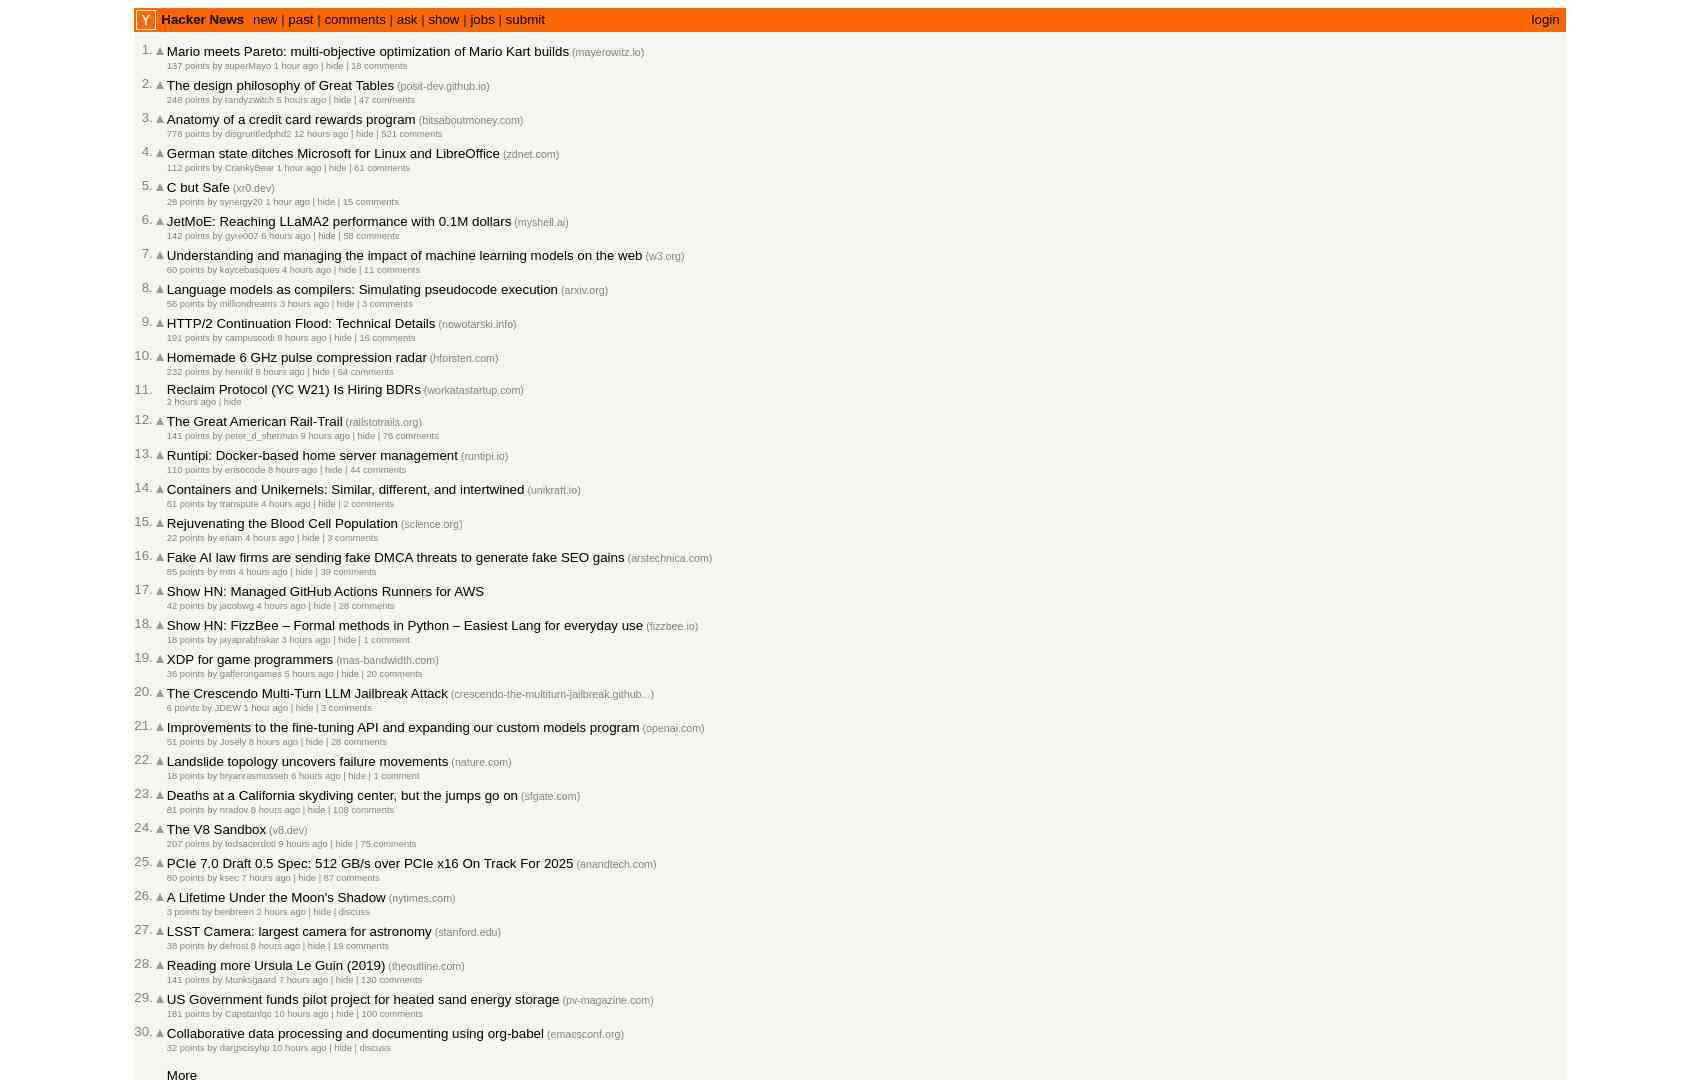

In [21]:
from IPython.display import display, Image
import requests

def display_image_from_url(url):
    response = requests.get(url)
    img = Image(response.content)
    display(img)

display_image_from_url(get_screenshot.screenshot)

`close_session`: Terminate the agent and close the session

In [14]:
close_session_response = multion.sessions.close(session_id=session_id)
print("close_session_response: ", close_session_response)

close_session_response:  status='Session closed' session_id='5963970b-1a23-4115-9f1b-794c0e0aa3e9'
